
## MINI Project: LOGISTIC REGRESSION and SVM -- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

### Introduction
* For this project will be using North Carolina Schools education data. The data is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI) which is charged with implementing the state's public school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

* Our starting datasets[All_Data_By_School_Final] and [1516_Test_Scores] were taken from Dr. Drews github where he combines multiple datasets from North Carolina Schools education data, preprocesses them and cleans for Machine learning. You can learn more on the data set from Dr.Drew's github https://github.com/jakemdrew/EducationDataNC.

* We performed Visualization on s usbset of the data targeted for schools with `high schools`, which can be accessed from https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory

#Read in raw data

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/All_Data_By_School_Final.csv"
s=requests.get(url).content

schoolData=pd.read_csv(io.StringIO(s.decode('utf-8')))

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/1516_Test_Scores.csv"
t=requests.get(url).content

testScores=pd.read_csv(io.StringIO(t.decode('utf-8')))

#Review raw data before the join
schoolData.info()

#join files using school / unit code
schools = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
#highschools = pd.read_csv(wd+'/data/highschools.csv', low_memory=False)
#highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
schools.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 305 entries, Year to Percent GLP
dtypes: float64(262), int64(17), object(26)
memory usage: 6.0+ MB


### Data Meaning Type 

In [3]:
url = 'https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/DataMeaningType.csv'

s=requests.get(url).content
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_colwidth', 150)
pd.read_csv(io.StringIO(s.decode('utf-8')))


,Attribute,Meaning,Type
0,unit_code,Code to identify School/LEA/State,Object
1,type_cd_txt,Type of school (Chater or Public),Object
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object
3,school_type_txt,Description of School type,Object
4,calendar_only_txt,Description of Calendar (Traditional or Year-Round),object
5,title1_type_flg,Title I Status,bool
6,clp_ind_flg,Consistently low performing school,bool
7,focus_clp_flg,Focus school designation based on CLP,bool
8,summer_program_flg,Summer school program included in Read to Achieve results,bool
9,asm_no_spg_flg,No School Performance Grade due to alternative school status,bool


#### Data Dictionary
> Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [3]:

DataDict=pd.read_csv(io.StringIO(s.decode('utf-8')))

DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.Attribute==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: category_cd
You entered:  category_cd


,Attribute,Meaning,Type
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object


### Data Quality

##### *Missing Data Statistics*

> In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discusss the approach for handling them.

In [4]:
#Check for missing values
Temp = pd.DataFrame(schoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in schoolData: ',len(schoolData))
print('No of Columns in schoolData: ',len(schoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(schoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(schoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))/len(schoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))/len(schoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(schoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(50)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in schoolData:  2579
No of Columns in schoolData:  293
No. of Columns with Missing data:  216
No  of Complete data columns:  77
No. of Columns with 100% missing Values:  20
No. of Columns more than 95% missing Values:  27
% of Columns with some Missing data:  73.72 %
% of Columns with 100% Missing data:  6.826 %
% of Columns with more than 95% Missing data:  9.215 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0          2579      PASSED_RTA_State_Pct  100.000000
1          2579        prinyrs_0thru3_pct  100.000000
2          2579         GCE_RPF_State_Pct  100.000000
3          2579           esea_attendance  100.000000
4          2579       lea_esea_attendance 

> From above we note, of the 305 columns in SchoolData, 228 (74.8%) of them have some missing data. 32(10.5%) of columns have all the data missing where 39 (12.8%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for this columns was not just collected by mistake. On the other hand, for the partally completed datasets, some schools might have left these columns blank if they didn't apply to them.

> For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of missing rows of data with predetermined data, our model maybe baised and throw were predictions off.

In [5]:
#All columns from Original schoolData
AllColumns =schoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(38) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = schoolData[SelectedColumns]

#drop the key column. 
del schoolDataNew['unit_code']

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(schoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)


##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 254 entries, lea_short_susp_per_c_num to Avg_Dist_Size_Biology
dtypes: float64(218), int64(17), object(19)
memory usage: 5.0+ MB
None


,lea_short_susp_per_c_num,Overall Achievement Score,szip_ad,lea_services_expense_pct,Reading SPG Grade,lea_books_per_student,The ACT Score,st_highqual_class_lp_pct,digital_media_pct,highqual_class_pct,...,lea_expelled_per_c_num,Math Score,GCE_ALL_Dist_Pct,st_prinyrs_11plus_pct,Avg_Dist_Size_08,st_tchyrs_4thru10_pct,State_Tch_Exp_Pct_10+_Years,st_ap_pct_3_or_above,Dist_Tch_Exp_Pct_0_3_Years,Avg_Dist_Size_Biology
0,NaN,NaN,28115,NaN,NaN,NaN,NaN,0.976,NaN,0.872,...,NaN,NaN,NaN,0.143,NaN,0.226,0.547,0.51,NaN,NaN
1,NaN,NaN,27560,NaN,NaN,NaN,NaN,0.976,NaN,0.909,...,NaN,NaN,NaN,0.143,NaN,0.254,0.491,0.51,NaN,NaN
2,12.37,NaN,27253,0.074,NaN,NaN,NaN,0.976,NaN,0.964,...,0.0,NaN,NaN,0.143,NaN,0.235,0.534,0.51,0.242,18.0
3,5.89,NaN,27253,0.074,NaN,14.24,NaN,0.976,0.01,1.000,...,0.0,NaN,0.143,0.143,NaN,0.273,0.500,0.51,0.276,NaN
4,5.89,NaN,27244,0.074,NaN,14.24,NaN,0.976,0.00,1.000,...,0.0,NaN,0.143,0.143,NaN,0.273,0.500,0.51,0.276,NaN


> In the code block above, we drop 38 columns which have >95% of the data missing. We also delete the unit_code column which is a key to identify the school/Lea/state. 

In [6]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew[Columns2Keep]
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(Columns2Keep))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 108 entries, Avg_Dist_Size_04 to flicensed_teach_pct
dtypes: float64(108)
memory usage: 2.1 MB
 
##########################################
#     Columns with Categorical data      #
##########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 9 columns):
Reading SPG Grade       1870 non-null object
Math SPG Grade          1870 non-null object
EVAAS Growth Status     2312 non-null object
grades_BYOD             2313 non-null object
grades_1_to_1_access    2313 non-null object
Byod                    2313 non-null object
1_to_1_access           2313 non-null object
SPG Grade               2364 non-null object
calendar_only_txt       2578 non-null object
dtypes: object(9)
memory us

> In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 129 columns retained with missing data, 120 are of dtype float64. After reviewing individual columns description from the data dictionary, we choose to replace these missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects and bool)
For the 9 categorical columns, we will be replacing the missing values with mode.

In [7]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #catagorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
lea_short_susp_per_c_num                           162
Overall Achievement Score                          256
szip_ad                                              0
lea_services_expense_pct                           160
Reading SPG Grade                                  709
lea_books_per_student                              359
The ACT Score                                     2077
st_highqual_class_lp_pct                             0
digital_media_pct                                  271
highqual_class_pct                                  15
Science Score                                      797
st_emer_prov_teach_pct                               0
lea_wap_num                                        160
st_advance_dgr_pct                                   0
st_prinyrs_4thr

> In the code block above, we replaced missing catagorical values with mode and missing continuous values with median. A total of 129 columns with missing values have been cleaned

In [8]:
new_schooldata.shape

(2579, 254)

category_cd
A      63
E    1320
H     505
I     142
M     478
T      71
dtype: int64

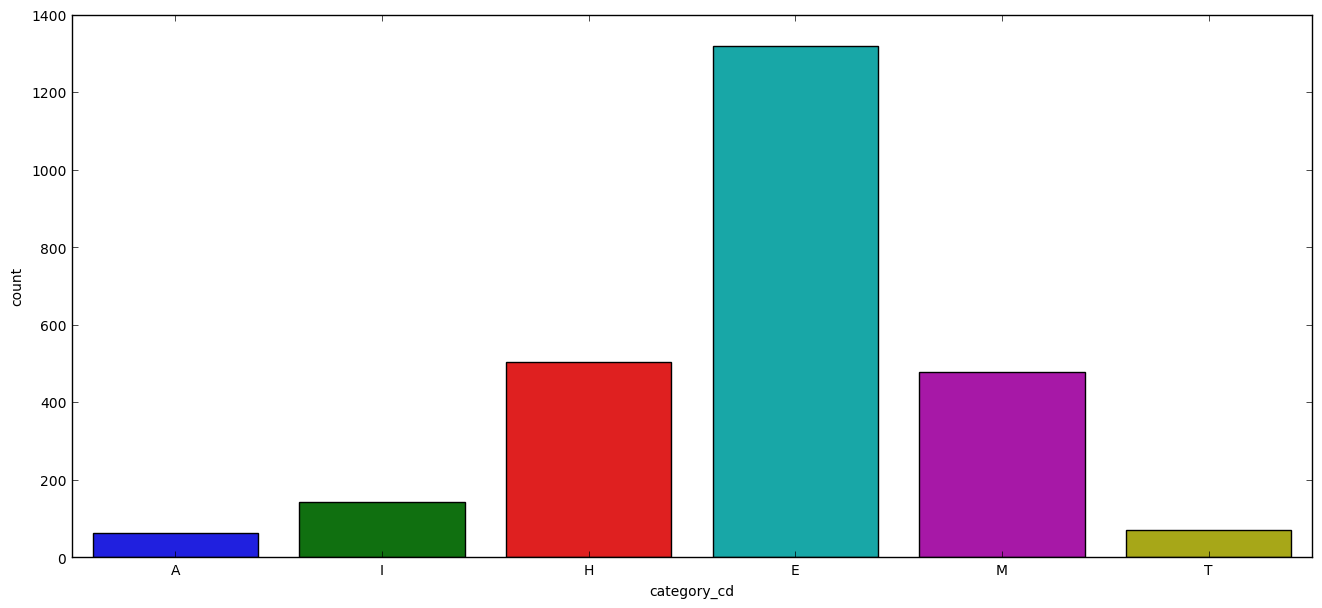

In [9]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

>  The bar graph above is shows the distribution of different school categories in state of North Carolina. See summary table below for school category descriptions and % distribution

Category | Description|Count |Percentage
--- | --- | ---|---
A | School has elementary, middle, and high school grades  | 63|2.44%
E | School has elementary schools grades (PK-5) | 1320|51.18%
H | School has high schools grades (9-13)  | 505|19.58%
I | Schools with elementary, middle and high school grades | 142|5.51%
M | School has middle schools grades (6-8)  | 478|18.53%
T | School has middle and high school grades | 71|2.75%

### New Features

In [10]:
#1
#################################################
#               New Features                    #
#################################################
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["<40", "40-54", "55-69",'70-84',"85-100"]))
#2
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' ] # Weight 0.6
bin2 = ['The ACT Score','ACT WorkKeys Score' ,'Math Course Rigor Score'] # weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))


School_Final = new_schooldata.drop(groupedbins, 1)
School_Final.T


,0,1,2,3,4,5,6,7,8,9,...,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578
lea_short_susp_per_c_num,10.59,10.59,12.37,5.89,5.89,24.71,12.37,5.89,5.89,12.37,...,10.59,10.59,10.59,10.59,10.59,10.59,10.59,10.59,10.59,10.59
Overall Achievement Score,59,59,59,59,59,59,59,59,59,59,...,88,37,59,71,77,27,44,51,53,56
szip_ad,28115,27560,27253,27253,27244,27217,27217,27215,27302,27302,...,27587,27844,27610,27846,28607,27530,27530,28676,27893,27896
lea_services_expense_pct,0.081,0.081,0.074,0.074,0.074,0.074,0.074,0.074,0.074,0.074,...,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081,0.081
Reading SPG Grade,C,C,C,C,C,C,C,C,C,C,...,A,D,C,C,B,F,C,C,D,C
lea_books_per_student,19.64,19.64,19.64,14.24,14.24,14.24,14.24,14.24,14.24,14.24,...,19.64,19.64,19.64,19.64,19.64,19.64,19.64,19.64,19.64,19.64
The ACT Score,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,61.5,...,61.5,29,61.5,71,61.5,61.5,61.5,61.5,61.5,61.5
st_highqual_class_lp_pct,0.976,0.976,0.976,0.976,0.976,0.976,0.976,0.976,0.976,0.976,...,0.976,0.976,0.976,0.976,0.976,0.976,0.976,0.976,0.976,0.976
digital_media_pct,0.01,0.01,0.01,0.01,0,0.1,0.92,0,0,0,...,0.01,0.01,0,0.01,0.01,0,0.01,0.1,0.01,0.01
highqual_class_pct,0.872,0.909,0.964,1,1,0.981,1,1,0.952,0.86,...,0.577,0.635,1,1,1,0.7,0.462,0.857,0.487,0.689


> From above code, we have created two new features from our dataset.

> 1. Overall_Achievement_Score_bins:
this is to groub the Overall Achievement Score into bins 
A: 85-100,
B: 70-84,
C: 55-69,
D: 40-54,
F:<40
> 2. SchoolWeightedScore: Summation of all achievement measures Scores.`EVAAS Growth Score` and `Overall Achievement Score` are put on bin1 and given a  weight 0.6 of the overall weighted school school.`The ACT Score`, `ACT WorkKeys Score` , and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1. When we get to lab two, we will use this features to see if they improve our model performance.


### moving forward we will use this data with the new created features for modeling

In [11]:
modelingdata=School_Final.copy()

In [12]:
#url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/modelingdata.csv"
s=requests.get(url).content

#modelingdata=pd.read_csv(io.StringIO(s.decode('utf-8')))
modelingdata.head()

,lea_short_susp_per_c_num,Overall Achievement Score,szip_ad,lea_services_expense_pct,Reading SPG Grade,lea_books_per_student,The ACT Score,st_highqual_class_lp_pct,digital_media_pct,highqual_class_pct,...,GCE_ALL_Dist_Pct,st_prinyrs_11plus_pct,Avg_Dist_Size_08,st_tchyrs_4thru10_pct,State_Tch_Exp_Pct_10+_Years,st_ap_pct_3_or_above,Dist_Tch_Exp_Pct_0_3_Years,Avg_Dist_Size_Biology,Overall_Achievement_Score_bins,SchoolWeightedScore
0,10.59,59.0,28115,0.081,C,19.64,61.5,0.976,0.01,0.872,...,0.103,0.143,23.0,0.226,0.547,0.51,0.215,19.0,55-69,173.07
1,10.59,59.0,27560,0.081,C,19.64,61.5,0.976,0.01,0.909,...,0.103,0.143,23.0,0.254,0.491,0.51,0.215,19.0,55-69,173.07
2,12.37,59.0,27253,0.074,C,19.64,61.5,0.976,0.01,0.964,...,0.103,0.143,23.0,0.235,0.534,0.51,0.242,18.0,55-69,173.07
3,5.89,59.0,27253,0.074,C,14.24,61.5,0.976,0.01,1.000,...,0.143,0.143,23.0,0.273,0.500,0.51,0.276,19.0,55-69,173.07
4,5.89,59.0,27244,0.074,C,14.24,61.5,0.976,0.00,1.000,...,0.143,0.143,23.0,0.273,0.500,0.51,0.276,19.0,55-69,173.07


In [13]:
modelingdata.shape

(2579, 256)

In [14]:
modelingdata.Overall_Achievement_Score_bins.head()

0    55-69
1    55-69
2    55-69
3    55-69
4    55-69
Name: Overall_Achievement_Score_bins, dtype: category
Categories (5, object): [<40 < 40-54 < 55-69 < 70-84 < 85-100]

> # LOGISTIC REGRESSION and SUPPORT VECTOR MACHINE

### SECTION 1  [50 Points ]: 
1. Create a logistic regression model and a support vector machine model for the classification task involved with your dataset.

2. Assess how well each model performs (use 80/20 training/testing split for your data). 
3. Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. 
4. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

#### summer_program_flg  Classification

For this Classification exercise (Logistic regression and SVM) modeling we have choosen to builds models to predict if a school has a summer program or not which is depicted by the boolean attribute `summer_program_flg` based on all the other features of the North Carolina Education data. In the code block below we create two dataset, the observed data X and an external variable y.

In [15]:
%%time
#Create data = x
df_X = modelingdata.copy()
#create target = Y
df_y = df_X.summer_program_flg.abs()
print('X shape before ')
print(df_X.shape)
#drop the response column from the x dataset
df_X.pop('summer_program_flg')
print('X shape after ')
print(df_X.shape)
print('Y shape after ')
print(df_y.shape)



X shape before 
(2579, 256)
X shape after 
(2579, 255)
Y shape after 
(2579,)
CPU times: user 4.7 ms, sys: 2.26 ms, total: 6.96 ms
Wall time: 4.45 ms


> in above code, we split that data into X and y for modeling

Summer_program_flg
Counter({0: 1702, 1: 877})


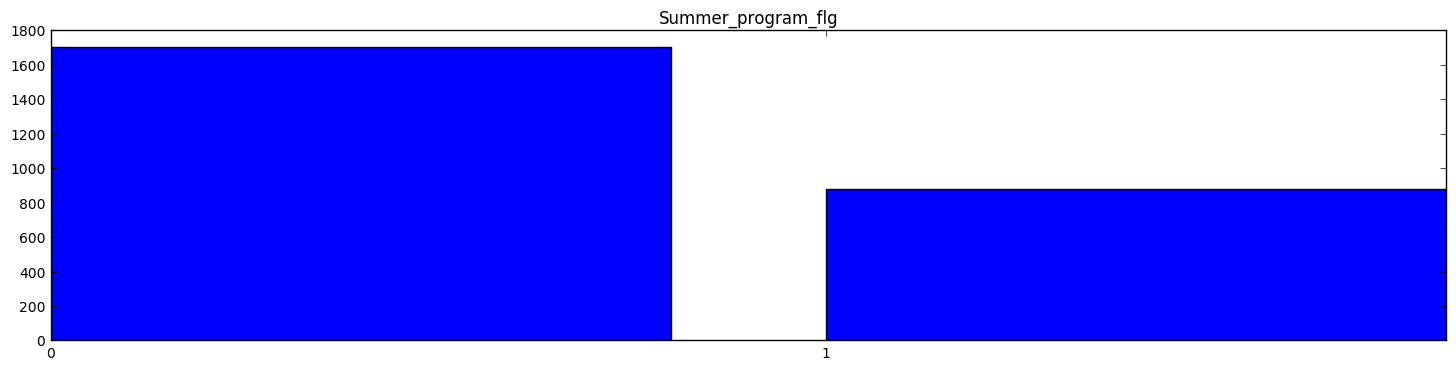

CPU times: user 244 ms, sys: 9.09 ms, total: 253 ms
Wall time: 253 ms


In [18]:
%%time
import collections
import matplotlib.pyplot as plt
a = df_y
data=collections.Counter(a)
print('Summer_program_flg')
print(data)

names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (18,4))
plt.title('Summer_program_flg')
plt.bar(range(len(data)),values,tick_label=names)

#plt.savefig('bar.png')
plt.show()

The spread of the summer_program_flag is good  for classification with 1720 samples for false and 877 for true as shown in the bar chart above though Skewed more to the false (0) flag.

### Data Preparation for Classification

In [19]:
%%time
def dummy_Create(df):
    schoolDataFinal = df.copy()
    SchoolDataCat = schoolDataFinal.loc[:,(schoolDataFinal.dtypes == bool)| (schoolDataFinal.dtypes == object) |(schoolDataFinal.dtypes == 'category')]#.columnscategory
    
    # drop the two street address columns
    try: 
        SchoolDataCat.pop('street_ad')
        #SchoolDataCat.pop('scity_ad')
    except Exception as e:
        print(e.args)
    print(SchoolDataCat.columns)
    cat_vars=SchoolDataCat.columns
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(schoolDataFinal[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars=SchoolDataCat.columns
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]

    ## Final data columns
    data_final=data[to_keep]
    try:
        data_final.pop('street_ad')
        #data_final.pop('scity_ad')
    except Exception as e:
        print(e.args)
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    y=['summer_program_flg']
    X=[i for i in data_final_vars if i not in y]
 
    list(data_final_vars)
    print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final.abs())
    
df_X_new = dummy_Create(df_X)


Index(['Reading SPG Grade', 'Closed_Ind_Text', 'type_cd_txt', 'category_cd',
       'New_ind_Txt', 'Math SPG Grade', 'calendar_only_txt', 'scity_ad',
       'state_ad', 'Byod', 'SPG Grade', '1_to_1_access',
       'grades_1_to_1_access', 'EVAAS Growth Status', 'esea_status',
       'grades_BYOD', 'school_type_txt', 'Grad_project_status',
       'Overall_Achievement_Score_bins'],
      dtype='object')
['summer_program_flg']
CPU times: user 325 ms, sys: 31.5 ms, total: 357 ms
Wall time: 357 ms


> For the purpose of modeling, we encode selected categorical columns as individual integer columns with 1 and zeros. This is achived using the function  above which identifies catagorical columns and creates dummy variables for them then deletes the old features from weather the dummy variables have been derieved from. 

> We also deleted street address column as each school would have unique address but kept the scity_ad which is the city address to see if geograpical location impacted the existance of the summer flag.

> The code block that follows just show the categorical columns that we end up encoding

> When we attempted to run the logistic model the firt time we noticed that some boolean columns we encoded as -1 and 0. We called abs() fuction on the data to convert all the negative values to positive in order to run our model.

In [20]:
%%time
lsted = ['grades_1_to_1_access', 'grades_BYOD', 'EVAAS Growth Status',
       'SPG Grade', 'Byod', 'scity_ad', '1_to_1_access', 'school_type_txt',
       'esea_status', 'Math SPG Grade', 'calendar_only_txt', 'Closed_Ind_Text',
       'New_ind_Txt', 'Grad_project_status', 'category_cd', 'state_ad',
       'type_cd_txt', 'Reading SPG Grade', 'Overall_Achievement_Score_bins']

for i in lsted:
    print(i)
    print("*******************")
    print(pd.unique(df_X[i]))

grades_1_to_1_access
*******************
['-' '9:10:11:12' '10:11:12' '6:07:08' '9:10' '6' '4:05' '5:06' '7'
 '9:10:11:12:13' '7:08' '6:7:8:9:10:11:12' '5:06:07' '9:12' '6:08'
 '3:04:05' '6:7:8:9:10:11:12:13' '4:05:06' '3' 'K:1:2:3' '4' '9:10:12'
 'K:1:2:3:4:5' 'K:1:2:3:4:5:6:7:8' '5' '6:07' '11:12:13' '8' 'PK'
 '4:5:6:7:8:9:10:11:12' '9' '6:7:8:9' '8:09' '5:6:7:8:9:10:11:12' '9:10:11'
 '6:7:8:9:10' '8:9:10:11:12']
grades_BYOD
*******************
['-' '6' '9:10:11:12' '3:4:5:6:7:8:9:10:11:12' '3:4:5:6:7:8'
 '9:10:11:12:13' '6:07:08' 'K:1:2:3:4:5' 'K:1:2:3:4:5:6:7:8' 'K:1:2:3:4'
 'PK:K:1:2:3' '7:08' 'PK:K:1:2:3:4' '5:06' '4:05' '2:03:04' '1:2:3:4:5'
 '2:3:4:5' '9:11:12' '3:04:05' 'PK:K:1:2:3:4:5' 'PK:9:10:11:12' '5'
 '6:7:8:9:10:11:12' 'PK:5' 'PK:K:1:2:3:4:5:7:8' '9:10:11'
 'PK:K:1:2:3:4:5:6:7:8' 'K:1:2:3:4:5:6' '7:8:9:10:11:12' '8:9:10:11:12'
 'K:1:2:3:4:5:6:7:8:9:10:11:12:13' '6:7:8:9:10' '6:7:8:9:11:12' '3:04' '3'
 'K:3:4' '5:6:7:8' '7' 'K:1:2:4:5' 'PK:K:1:2:3:4:5:6:7:8:9:10:11:12:13

#### Splitting dataset into train and test datasets

In [21]:
df_X = df_X_new.copy()
df_X.shape

(2579, 889)

> After completing the data encoding, we split our data into 80% instances for train dataset and the remaining 20% for the test dataset. We use a random_state seed of 4 to ensure reproducibility of our results.

> For the purposes of cross validation, we repeat this process of separating the testing and training data 10 times. We will use this cross validation method built into scikit-learn.

> `The Code block below is derived from Proffesor Larson's notebook on Logits and SVM for MSDS 7331` https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb

> On the raw dataset,as shown below, we have a model with an accuracy of about 71%. For repeatable results, we continue to use a random_state seed of 4 for the shuffle splits.

#### Trial logistic regression on the raw dataset.

In [22]:
%%time
# run logistic regression and vary some parameters
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

X = df_X.values
y = df_y.values

num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 4)
                         
print(cv_object)
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

ShuffleSplit(n_splits=10, random_state=4, test_size=0.2, train_size=None)
====Iteration 0  ====
accuracy 0.728682170543
confusion matrix
 [[303  48]
 [ 92  73]]
====Iteration 1  ====
accuracy 0.713178294574
confusion matrix
 [[291  44]
 [104  77]]
====Iteration 2  ====
accuracy 0.705426356589
confusion matrix
 [[298  39]
 [113  66]]
====Iteration 3  ====
accuracy 0.674418604651
confusion matrix
 [[298  53]
 [115  50]]
====Iteration 4  ====
accuracy 0.71511627907
confusion matrix
 [[284  47]
 [100  85]]
====Iteration 5  ====
accuracy 0.718992248062
confusion matrix
 [[301  48]
 [ 97  70]]
====Iteration 6  ====
accuracy 0.717054263566
confusion matrix
 [[295  40]
 [106  75]]
====Iteration 7  ====
accuracy 0.713178294574
confusion matrix
 [[299  34]
 [114  69]]
====Iteration 8  ====
accuracy 0.701550387597
confusion matrix
 [[294  40]
 [114  68]]
====Iteration 9  ====
accuracy 0.730620155039
confusion matrix
 [[307  49]
 [ 90  70]]
CPU times: user 6.12 s, sys: 95.1 ms, total: 6.21 s
Wall 

In [23]:
#create test and training sets from data and target created above
X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 4)

#### RUN CORRELATION to get the highly correlated columns to eliminnate
To improve the perfomance of our logistics regression model, we begin by running a correlation matrix on our X dataset to identify Multicollinearity of predictors and eliminate the highly correlated predictors.

In [24]:
%%time
#finding a list of the most correlated features
print('X df before running correlation')
print(df_X.shape)
c = df_X.corr().abs()
s =pd.DataFrame(c.unstack())
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)



#filter to correlation between range
result1 =  result[(result.correlation < 0.95)]

result1
#combine the columns into a list
col= pd.DataFrame(result1.Column1)
col.columns = ['Columns']
col1 =pd.DataFrame(result1.Column2)
col1.columns = ['Columns']
df = col.append(col1)

#find only unique columns
UniqueColumns =pd.unique(df.Columns)

df_X = df_X[UniqueColumns]

#shape on the new df_X
df_X.reset_index()
df_y.reset_index()
print('X df after running correlation')
print(df_X.shape)
result.head()

X df before running correlation
(2579, 889)
X df after running correlation
(2579, 864)
CPU times: user 3.52 s, sys: 101 ms, total: 3.62 s
Wall time: 3.61 s


In the code block above we find the run correlation on the X df to identify the most strongly correlated features >0.95 and remove them.  25 features are eliminated for being highly correlated thus redundant.

## Feature selection

> The next step in our feature selection is selection of top  features using chi-squared test.

> In the section below, we perform a systematic feature selection to identify the optimal number of features that we need to fit our data the best by looking at the model accuracy based on % of features used.

> Reference:
> https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Titanic.ipynb 

> http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

1 0.67713696569
6 0.708674438782
11 0.71554176002
16 0.724247499597
21 0.727028145089
26 0.720834706175
31 0.727018443673
36 0.731411720775
41 0.729955135527
46 0.723210271786
51 0.738590036463
56 0.7391182145
61 0.731378864092
66 0.738217721741
71 0.742549495526
76 0.735239112449
81 0.734348321106
86 0.734386028497
91 0.736285401016
96 0.693647860563
Optimal percentile of features:71 

("'numpy.ndarray' object has no attribute 'columns'",)
CPU times: user 3min 47s, sys: 1.83 s, total: 3min 49s
Wall time: 2min 44s


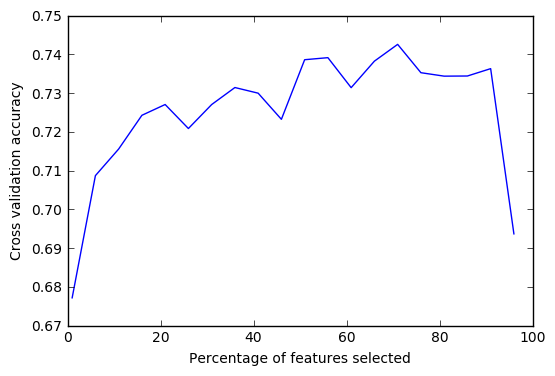

In [25]:
%%time
from sklearn import cross_validation
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
dt = LogisticRegression( C=1, class_weight=None) 

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=20)
    print(i,scores.mean())
    results = np.append(results, scores.mean())
try:
    optimal_percentile = np.where(results == results.max())[0]
    print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
    optimal_num_features = int(percentiles[optimal_percentile]*len(X.columns)/100)
    print("Optimal number of features:{0}".format(optimal_num_features), "\n")
    print(dt.get_params())
except Exception as e:
    print(e.args)
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

> > From above figure of cross validation accuracy vs percentage of features selected, 61% of the features gives us the best perfoming model that fits our data.

In [26]:
%%time
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=61)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)
print('')

[ True  True  True False  True  True False  True False  True False  True False
 False False  True False  True False  True False False False  True  True False
 False  True False False False  True  True  True False  True False False  True
 False False False False False False False False False False  True False False
 False  True False  True False False False  True  True False  True False  True
 False False False  True False False False False  True  True False  True  True
  True  True  True False False False  True  True False False False False False
 False False False False False False False False False False False False False
 False  True  True  True  True  True False False False  True False False False
 False False  True False False False  True False False  True  True  True  True
 False False  True False  True False  True  True False False False  True False
  True False False False False False False False  True False  True False False
 False  True False False False False  True False Fal

> In the code above, we select 61% of the features in our training set based on Chi2 test.

In [27]:
%%time
Chi2_Score = pd.DataFrame()

for i in range(len(df_X.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': df_X.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score       

CPU times: user 874 ms, sys: 3.65 ms, total: 878 ms
Wall time: 878 ms


Above table shows our selected features with their chi-squared score

In [28]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dt = LogisticRegression( C=1, class_weight=None)

lencol = int(0.66*X_train.shape[1]) #count 66% of the columns
X_new = SelectKBest(chi2, k=lencol).fit_transform(X_train, y_train) #select the 20 best cols

scores = cross_validation.cross_val_score(dt, X_new, y_train, cv=20)

#values for 30 fold cross validation
print('20 fold cross validation score')
print('-------------------------------')
print(scores)
#average score
print('-------------------------------')
print('average score of the 20 fold cross validation')
print(scores.mean())


20 fold cross validation score
-------------------------------
[ 0.77  0.75  0.71  0.71  0.76  0.72  0.76  0.69  0.81  0.81  0.73  0.68  0.73
  0.78  0.7   0.7   0.72  0.78  0.74  0.7 ]
-------------------------------
average score of the 20 fold cross validation
0.736704941499
CPU times: user 11.6 s, sys: 123 ms, total: 11.7 s
Wall time: 8.09 s


A model with 61% of features selected based on the chi-square yields 72% accurancy as shown above 20 fold cross validation. Below we test our model based on trained based on the selected features on our test dataset.

In [30]:
%%time
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logis= LogisticRegression( C=1, class_weight=None) 
logis.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = logis.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logis.score(X_test_new, y_test))) 


Accuracy of logistic regression classifier on test set: 0.7016
CPU times: user 253 ms, sys: 5.86 ms, total: 259 ms
Wall time: 258 ms


## SK work

In [33]:
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train.shape)
print(y_test.shape)

(2063, 525)
(516, 525)
(2063,)
(516,)


### Build a SVM model

In [37]:
%%time
# import the SVC class
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_new, y_train)
y_pred_svc = svc.predict(X_test_new)
print(metrics.accuracy_score(y_test, y_pred_svc))

0.709302325581
CPU times: user 3.42 s, sys: 27.6 ms, total: 3.45 s
Wall time: 3.49 s


### Tune SVM

We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. We will use linear kernel and vary the C value to see if that improves our model.

In [38]:
%%time
# Train the model with kerner = `linear` and default C value.
svc = SVC(kernel='linear')
svc.fit(X_train_new, y_train)
y_pred_svc = svc.predict(X_test_new)
print(metrics.accuracy_score(y_test, y_pred_svc))

0.705426356589
CPU times: user 21 s, sys: 29.1 ms, total: 21 s
Wall time: 21.1 s


Observation: Took about ~4 times more time to run a `linear` kernel SVM model than a `RBF` based kernel.

### Comparing Logistic Regression with SVM

In this section, we will compare the Logistic Regression model with SVM model. The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. We can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

In [43]:
%%time
# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("SVM_Kernel_linear", SVC(kernel='linear')))
models.append(("SVM_Kernel_linear_C1.5", SVC(C=1.5, kernel='linear')))

# declare results
results = []

# declare names to hold model names
names = []

for name, model in models:
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results.append(accuracy)
    names.append(name)
    print("%s: %f" %(name, accuracy))

LogReg: 0.701550
LogReg_C2: 0.709302
LogReg_C10: 0.711240
SVM: 0.709302
SVM_Kernel_linear: 0.705426
SVM_Kernel_linear_C1.5: 0.709302
CPU times: user 47.4 s, sys: 121 ms, total: 47.5 s
Wall time: 47 s


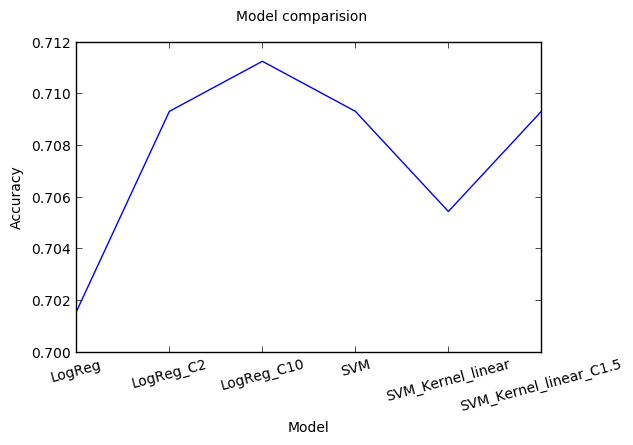

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Model comparision')
ax = fig.add_subplot(111)
plt.plot(results)
plt.xlabel("Model")
plt.ylabel("Accuracy")
ax = ax.set_xticklabels(names, rotation='15')

The best model when using 80-20 train/test split with accuracy as our metric of evaluation is `Logistic Regression with C = 10` (accuracy=0.711240)

## Stochastic Gradient Descent

We will use `Stochastic Gradient Descent` to calculate the coefficients of the Logistic Regression model with C=10 and see if this yields a better prediction accuracy.

In [45]:
%%time
# Step 1: import the class
from sklearn.linear_model import SGDClassifier

# Step 2: instantiate the object
sgd_logreg = SGDClassifier()

# fit the model
sgd_logreg.fit(X_train_new, y_train)

# predict on test
y_pred = sgd_logreg.predict(X_test_new)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.678294573643
CPU times: user 20.6 ms, sys: 2.36 ms, total: 23 ms
Wall time: 20.8 ms


Compared with LogisticRegression model the SGDClassier did not yield a better accuracy. We will try to tune the number of iterations of SGDClassifier to see if that improves the classification accuracy.

### Tune SGDClassifier

In [62]:
%%time
# instantiate the object
sgd_logreg = SGDClassifier(n_iter=10)

# fit the model
sgd_logreg.fit(X_train_new, y_train)

# predict on test
y_pred = sgd_logreg.predict(X_test_new)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.68023255814
CPU times: user 30.4 ms, sys: 2.38 ms, total: 32.8 ms
Wall time: 30.5 ms


0.736434108527 5
CPU times: user 2.28 s, sys: 53.7 ms, total: 2.34 s
Wall time: 1.18 s


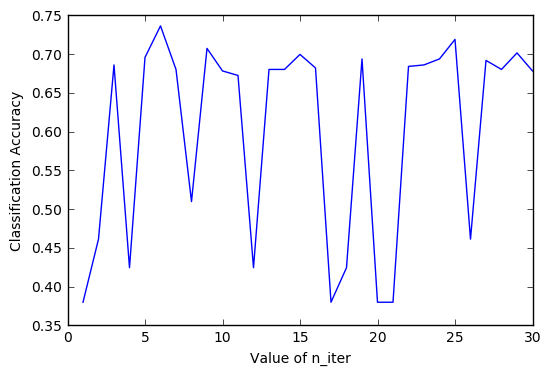

In [70]:
%%time
# search for an optimal value of n_iter
n_range = range(1, 31)
n_scores = []
for n in n_range:
    sgd_logreg = SGDClassifier(n_iter=n)
    sgd_logreg.fit(X_train_new, y_train)
    y_pred = sgd_logreg.predict(X_test_new)
    n_scores.append(metrics.accuracy_score(y_test, y_pred))

print(max(n_scores), np.argmax(n_scores))

# plot the value of n_iter(x-axis) versus the classification accuracy (y-axis)
plt.plot(n_range, n_scores)
plt.xlabel('Value of n_iter')
plt.ylabel('Classification Accuracy')

There does not appear to be any single value that stands out to be the best n_iter value. We will use the default n_iter = 5 value.

### SECTION 2 [10 Points]:

1. Discuss the advantages of each model for each classification task. 
2. Does one type of model offer superior performance over another in terms of prediction accuracy? 
3. In terms of training time or efficiency? Explain in detail.

### SECTION 3 [30 Points]

1. Use the weights from logistic regression to interpret the importance of different features for the classification task. 
2. Explain your interpretation in detail. Why do you think some variables are more important?

We will use the SGDClassifier with default n_iter value of 5 to calculate the coefficients of Logistic regression model.

In [79]:
# instantiate the object
sgd_logreg = SGDClassifier(n_iter=5)

# fit the model
sgd_logreg.fit(X_train_new, y_train)

# get the coefficient/weights of the above model
coefs = list(sgd_logreg.coef_[0])

# take abs value of coefs since we are interested in weights
coefs = [abs(coef) for coef in coefs]

# get the features
features = list(X_train_new.columns)

# zip them
zipped = list(zip(features, coefs))

# create a dictionary
coef_features = dict(zipped)

# calculate the most important feature of the model
import operator
sorted_coef_features = sorted(coef_features.items(), key=operator.itemgetter(1), reverse=True)

# print features that have weights greater than 100
for feature, weight in sorted_coef_features:
    if (abs(weight) >= 100):
        print(feature, weight)

lea_wap_num 96331.0942196
lea_local_perpupil_num 86888.8191621
lea_total_expense_num 82887.1398268
student_num 37078.8403748
st_state_perpupil_num 35380.0689411
avg_age_media_collection 25761.0040658
szip_ad 19252.2538448
Overall Achievement Score 5960.75658476
wap_num 5401.27275941
SPG Score 4765.77691356
Math Score 4438.74845324
class_teach_num 1721.76065052
Biology Score 1473.39579282
nbpts_num 992.57557009
books_per_student 951.688173944
Avg_Class_Size_02 773.378115609
Avg_Dist_Size_02 699.133816511
Avg_Class_Size_Biology 654.056920629
Avg_Class_Size_03 593.954392788
Avg_Dist_Size_03 502.916740322
Avg_Dist_Size_01 476.400919215
Math Course Rigor Score 431.324023334
Avg_Class_Size_MathI 355.312002828
lea_crime_per_c_num 301.405338519
EVAAS Growth Score 284.426374403
stud_internet_comp_num 258.661834895
Avg_Class_Size_00 242.177832774
wap_per_classroom 222.255612515
scity_ad_Fayetteville 169.701255082
crime_per_c_num 148.143892523
scity_ad_Durham 121.088916387
st_books_per_student 11

### SECTION 4 [10 Points]

Look at the chosen support vectors for the classification task. 
1. Do these provide any insight into the data? Explain. 
2. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.